## Propuesta del Proyecto: 

### Objetivos:

* Desarrollar un método robusto para la detección y filtrado de outliers que mejore la calidad de los datos.

* Implementar un flujo de trabajo reproducible y transparente que permita una validación y revisión cruzada.

Desafío: La extracción de salmueras requiere un balance cuidadoso entre la maximización de la producción y la preservación del ecosistema del salar. Las operaciones en el Salar de Atacama enfrentan el reto constante de pronosticar con precisión el flujo y la concentración de iones en los pozos de extracción. Estos pronósticos son cruciales para la planificación operativa y la toma de decisiones estratégicas a corto y largo plazo.

Necesidad de Mejora: Recientemente se ha identificado una necesidad crítica de mejorar la trazabilidad y reproducibilidad de los Escenarios de Oferta, que son pronósticos semestrales utilizados para la planificación operativa y estratégica. Las deficiencias en la metodología actual han llevado a decisiones basadas en datos que a veces carecen de la rigurosidad necesaria, poniendo en riesgo la eficacia de la gestión de recursos hídricos.

Proyecto Actual: En respuesta a esta necesidad, se propone fortalecer el análisis de datos y la modelación hidrológica. El enfoque está en la aplicación de técnicas avanzadas de detección de outliers y análisis de datos para asegurar que la información utilizada en los modelos predictivos sea de la más alta calidad, mejorando así la precisión y fiabilidad de los Escenarios de Oferta.

Meta del Proyecto: El objetivo es desarrollar y validar un proceso mejorado para la detección de outliers, lo que resultará en un conjunto de datos optimizado para el modelado predictivo. Este proceso deberá ser transparente, reproducible y fácilmente revisable, garantizando así la integridad y la confianza en las decisiones estratégicas tomadas sobre la base de estos datos.





Preparación de los datos

La información en la cual se basa el pronóstico de caudales, para el periodo septiembre 2023 a septiembre 2025, corresponde a los caudales históricos observados en pozos de producción. Estos datos reales, proporcionados por TEST01, cubren entre enero 2014 a agosto 2023. Pozos adicionales utilizados se proyectan según resultados de escenario E110. En total se utilizaron datos de 444 pozos, pertenecientes a 4 sistemas (Litio Directo, MOP AS, MOP BS y Porteo).

Si bien es parte del procedimiento que las series temporales sean procesadas, aplicando filtros que eliminen datos anómalos (outliers) y exceso de ruido (esto con la finalidad de obtener tendencias principales que puedan proyectarse); en esta oportunidad los datos de entrada filtrados y procesados, fueron entregados por TEST01.

No obstante, en un proceso completo que considera la BBDD global de caudales reales, en cual se realice el proceso de limpieza, se debe considerar una serie de análisis estadísticos y distribución de datos, tanto de la serie completa como por tramos que identifique anomalías, ruido en las series y otros comportamientos relevantes a discriminar. La secuencia general de este procedimiento debe considerar:

1.- Recopilación de datos: Utilizando la BBDD de caudales reales, proveniente de TEST01 (Caudales “Opera”), se deben recopilar todos los datos de la serie temporal de forma completa y precisa. asegurándose de que los datos, fuentes y unidades sean consistentes entre si (por ej. caudales efectivos por día bombeados)

2.- Identificación de valores atípicos: Análisis de los datos a través de técnicas estadísticas, como gráficos de caja y diagramas de dispersión, para identificar valores atípicos. Estos valores pueden distorsionar los análisis posteriores y generar sobreestimación de errores en ajustes, por lo que es importante tratarlos adecuadamente y filtrarlos cuando corresponda (en esta etapa pueden incluirse tanto valores atípicos, caudales nulos, como caudales negativos que se aprecian en la BBDD bruta de caudales)

3.- Suavizado de la serie temporal: El ruido en las series temporales es un problema para los ajustes de los datos por medios de modelos o enfoques analíticos, pues las variaciones aleatorias en los datos difícilmente pueden ser replicadas y representadas en tendencias proyectadas, y a su vez aumentan innecesariamente el error en ajustes posteriores. Aplicar técnicas de suavizado, como promedios móviles o suavizado exponencial, para eliminar el ruido y las variaciones aleatorias en los datos, facilitará la identificación de patrones de comportamiento que tengan coherencia con la tendencia esperada de los datos.

4.- Detección de patrones anómalos: Estos patrones pueden incluir ascensos de caudal por periodos cortos, peaks que escapan de la tendencia histórica, u otras anomalías. Es importante buscar y filtrar patrones anómalos o comportamientos inusuales en la serie temporal. Esto puede implicar el uso de técnicas de anomalías o análisis de tendencias, que posteriormente puedan no ser consideradas para la proyección de caudales

5.- Verificación de consistencia y cambios de tendencias temporales recientes: Por último, dado que hay antecedentes de que ciertos pozos pueden tener cambios de bombeos asociados a una nueva regla operacional, que en ciertos casos pueden implicar un aumento o disminución de tasas de bombeo; que, a su vez, marquen una nueva tendencia o comportamiento a considerar. En estos casos, es importante asegurarse de que los datos del último periodo representen esta nueva tendencia por un periodo dado de tiempo (por ej. dos meses al menos) y no sea parte de mediciones o valores atípicos. Esto es esencial para que futuras proyecciones se ajusten a comportamientos reales de pozos y no tendencias desactualizadas






### Mapa de Proceso

### Para este ejercicio solo llegaremos hasta la etapa II


<div>
<img src="https://github.com/Godoca2/PyDataScience_ProyectoFinal/blob/main/Image/Mapa_de_Proceso.jpg?raw=true" width="1000"/>
</div>



### Script de Limpieza para información de caudales brutos operacionales

### 1.- Importación de archivo 'OperaFull extracción_hyper.csv'


Información de Campos:

* CaudalInstantaneo    
* CaudalMedio
* Densidad             
* Destino              
* FechaMedicionUTS     
* FechaMedicion
* HorasEstimadas       
* Horas                
* HorometroFinal       
* HorometroIncial
* H3BO3
* Cl_pct 
* Ca_pct     
* Li_pct               
* Mg_pct               
* Na_pct
* k_pct 
* S04_pct
* SatK                
* Número de registros  
* Observacion          
* Origen          
* Validez              
* VolumenEstimado      
* VolumenFinal         
* VolumenInicial       
* Volumen              
      

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from IPython.display import display
import gdown

#### Modularizacion Script para refactorizar el código

In [21]:
# Enlace de Google Drive
view_url = 'https://drive.google.com/file/d/1v00pR_Ww7_qZx8mtZjb-5NW-m9lT6uuV/view?usp=sharing'

# Obtener el ID del archivo de Google Drive
file_id = view_url.split('/')[5]

# Crear la URL directa
direct_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Descargar el archivo usando gdown
output = 'GV_OperaFull_Escenario_2024.csv'
gdown.download(direct_url, output, quiet=False)

# Cargar el archivo CSV con pandas
def load_csv_data(file_path: str) -> pd.DataFrame:
    """
    Cargar datos desde un archivo CSV con un delimitador especificado, manejar tipos de datos mixtos,
    y convertir valores numéricos con coma como separador decimal a float.
    
    Args:
        file_path (str): La ruta al archivo CSV.
        
    Returns:
        pd.DataFrame: Dataframe que contiene los datos.
    """
    # Leer el archivo CSV con el delimitador ';' y manejar tipos de datos mixtos
    df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip', low_memory=False)
    
    # Reemplazar comas por puntos en todas las columnas
    df = df.apply(lambda x: x.str.replace(',', '.') if x.dtype == 'object' else x)
    
    # Convertir las columnas a tipos numéricos donde sea posible
    df = df.apply(pd.to_numeric, errors='ignore')
    
    return df

# Cargar el archivo CSV descargado
df_train = load_csv_data(output)

# Mostrar el dataframe
print(df_train)



Downloading...
From (original): https://drive.google.com/uc?export=download&id=1v00pR_Ww7_qZx8mtZjb-5NW-m9lT6uuV
From (redirected): https://drive.google.com/uc?export=download&id=1v00pR_Ww7_qZx8mtZjb-5NW-m9lT6uuV&confirm=t&uuid=e9f19bd2-944b-46c7-b337-7749aa78a63b
To: c:\Entorno_Desarrollo_UDD\PyDataScience_ProyectoFinal\notebook\GV_OperaFull_Escenario_2024.csv
100%|██████████| 129M/129M [00:11<00:00, 11.1MB/s] 


          Origen         Destino    FechaMedicion  VolumenInicial  \
0       ARPES-01  Canaleta Arpes  01-01-2014 9:01         75447.0   
1       ARPES-01  Canaleta Arpes  02-01-2014 9:06         76219.0   
2       ARPES-01  Canaleta Arpes  03-01-2014 9:11         76860.0   
3       ARPES-01  Canaleta Arpes  04-01-2014 9:15         77502.0   
4       ARPES-01  Canaleta Arpes  05-01-2014 9:20         78144.0   
...          ...             ...              ...             ...   
814969   XP17-05           PDA-4  28-02-2024 9:14         55342.0   
814970   XP17-05           PDA-4  29-02-2024 9:19         55397.0   
814971   XP17-05           PDA-4  01-03-2024 9:24         55444.0   
814972   XP17-05           PDA-4  02-03-2024 9:30         55499.0   
814973   XP17-05           PDA-4  03-03-2024 9:02         55515.0   

        VolumenFinal  Volumen  HorometroIncial  HorometroFinal  Horas  \
0            76219.0    772.0          9185.01         9213.81  28.80   
1            76860.0    6

In [22]:
df_train.head()

,Origen,Destino,FechaMedicion,VolumenInicial,VolumenFinal,Volumen,HorometroIncial,HorometroFinal,Horas,CaudalInstantaneo,...,Ca_pct,S04_pct,Li_pct,Cl_pct,Densidad,H3BO3,SatK,VolumenEstimado,HorasEstimadas,FechaMedicionUTS
0,ARPES-01,Canaleta Arpes,01-01-2014 9:01,75447.0,76219.0,772.0,9185.01,9213.81,28.80,26.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,772.0,28.80,1.388567e+09
1,ARPES-01,Canaleta Arpes,02-01-2014 9:06,76219.0,76860.0,641.0,9213.81,9237.08,23.27,26.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,641.0,23.27,1.388654e+09
2,ARPES-01,Canaleta Arpes,03-01-2014 9:11,76860.0,77502.0,642.0,9237.08,9261.08,24.00,26.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,642.0,24.00,1.388740e+09
3,ARPES-01,Canaleta Arpes,04-01-2014 9:15,77502.0,78144.0,642.0,9261.08,9285.08,24.00,26.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,642.0,24.00,1.388827e+09
4,ARPES-01,Canaleta Arpes,05-01-2014 9:20,78144.0,78789.0,645.0,9285.08,9309.09,24.01,27.0,...,0.3,0.09,0.61,19.2,1.23,0.32,83.89,645.0,24.01,1.388914e+09


### Limpieza y Calculo de la nueva variable Caudal Medio Mensual l/s

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814974 entries, 0 to 814973
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Origen             814945 non-null  object 
 1   Destino            814945 non-null  object 
 2   FechaMedicion      814945 non-null  object 
 3   VolumenInicial     814945 non-null  float64
 4   VolumenFinal       814945 non-null  float64
 5   Volumen            814945 non-null  float64
 6   HorometroIncial    814943 non-null  float64
 7   HorometroFinal     814943 non-null  float64
 8   Horas              814943 non-null  float64
 9   CaudalInstantaneo  814936 non-null  float64
 10  CaudalMedio        783733 non-null  float64
 11  Validez            814945 non-null  float64
 12  Observacion        0 non-null       float64
 13  k_pct              814945 non-null  float64
 14  Na_pct             814945 non-null  float64
 15  Mg_pct             814945 non-null  float64
 16  Ca

Identificación de las Columnas 

In [24]:
list(df_train.columns)

['Origen',
 'Destino',
 'FechaMedicion',
 'VolumenInicial',
 'VolumenFinal',
 'Volumen',
 'HorometroIncial',
 'HorometroFinal',
 'Horas',
 'CaudalInstantaneo',
 'CaudalMedio',
 'Validez',
 'Observacion',
 'k_pct',
 'Na_pct',
 'Mg_pct',
 'Ca_pct',
 'S04_pct',
 'Li_pct',
 'Cl_pct',
 'Densidad',
 'H3BO3',
 'SatK',
 'VolumenEstimado',
 'HorasEstimadas',
 'FechaMedicionUTS']

Número de datos Disponibles en el DataSet

In [25]:
df_train.shape

(814974, 26)

In [26]:
duplicates = df_train[df_train.duplicated()]
print(duplicates)

       Origen Destino FechaMedicion  VolumenInicial  VolumenFinal  Volumen  \
564694    NaN     NaN           NaN             NaN           NaN      NaN   
564695    NaN     NaN           NaN             NaN           NaN      NaN   
564696    NaN     NaN           NaN             NaN           NaN      NaN   
564697    NaN     NaN           NaN             NaN           NaN      NaN   
564698    NaN     NaN           NaN             NaN           NaN      NaN   
564699    NaN     NaN           NaN             NaN           NaN      NaN   
564700    NaN     NaN           NaN             NaN           NaN      NaN   
564701    NaN     NaN           NaN             NaN           NaN      NaN   
564702    NaN     NaN           NaN             NaN           NaN      NaN   
564703    NaN     NaN           NaN             NaN           NaN      NaN   
564704    NaN     NaN           NaN             NaN           NaN      NaN   
564705    NaN     NaN           NaN             NaN           Na

In [27]:
# Check for NaN values in the DataFrame
df_train.isnull().sum()

Origen                   29
Destino                  29
FechaMedicion            29
VolumenInicial           29
VolumenFinal             29
Volumen                  29
HorometroIncial          31
HorometroFinal           31
Horas                    31
CaudalInstantaneo        38
CaudalMedio           31241
Validez                  29
Observacion          814974
k_pct                    29
Na_pct                   29
Mg_pct                   29
Ca_pct                   29
S04_pct                  29
Li_pct                   29
Cl_pct                   29
Densidad                 29
H3BO3                    29
SatK                     29
VolumenEstimado          29
HorasEstimadas           29
FechaMedicionUTS         29
dtype: int64

### Detectar y tratar los duplicados

In [28]:
def remove_duplicates(df: pd.DataFrame, columns_to_check: list) -> pd.DataFrame:
    """
    Remove duplicates based on specific columns.

    Args:
        df: DataFrame to remove duplicates from.
        columns_to_check: List of columns to check for duplicates.

    Returns:
        DataFrame with duplicates removed.
    """
    df = df.drop_duplicates(subset=columns_to_check, keep='first')
    return df

In [29]:
# Columnas de interés para revisar duplicados
columnas_para_revisar = ['Origen', 'FechaMedicion', 'HorometroFinal', 'HorometroIncial', 
                        'VolumenFinal', 'VolumenInicial', 'HorasEstimadas', 'CaudalMedio']
# Identificar duplicados
duplicados = df_train.duplicated(subset=columnas_para_revisar, keep=False)

# Contar duplicados
print(f"Total de filas duplicadas: {duplicados.sum()}")

# Revisar duplicados
print("filas duplicadas:")
print(df_train[duplicados].head())

df_train = remove_duplicates(df_train, columnas_para_revisar)

Total de filas duplicadas: 565
filas duplicadas:
        Origen         Destino     FechaMedicion  VolumenInicial  \
876   ARPES-01  Canaleta Arpes  25-12-2016 14:35        892180.0   
877   ARPES-01  Canaleta Arpes  25-12-2016 14:35        892180.0   
886   ARPES-01  Canaleta Arpes  31-12-2016 15:12        896144.0   
887   ARPES-01  Canaleta Arpes  31-12-2016 15:12        896144.0   
4269  ARPES-03  Canaleta Arpes  31-12-2016 15:12          4940.0   

      VolumenFinal  Volumen  HorometroIncial  HorometroFinal  Horas  \
876       892835.0    655.0          28812.1         28836.1   24.0   
877       892835.0    655.0          28812.1         28836.1   24.0   
886       896646.0    502.0          28963.8         28987.7   23.9   
887       896646.0    502.0          28963.8         28987.7   23.9   
4269        5053.0    113.0          27542.4         27567.4   25.0   

      CaudalInstantaneo  ...  Ca_pct  S04_pct  Li_pct  Cl_pct  Densidad  \
876                27.0  ...    0.27    

In [30]:
df_train.shape

(814678, 26)

### Cálculo Caudal Medio Mensual l/s (Nueva variable que permite realizar las predcciones en las siguientes etapas)

1. Función para convertir columnas a tipo numérico y tratar errores

In [31]:
def convert_columns_to_numeric(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Convert specified columns to numeric type, coercing errors.

    Args:
        df: DataFrame with columns to convert.
        columns: List of columns to convert to numeric.

    Returns:
        DataFrame with specified columns converted to numeric.
    """
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df


2. Función para filtrar registros según condiciones específicas

In [32]:
def filter_valid_records(df: pd.DataFrame) -> pd.DataFrame:
    """
    Filter records where relevant columns have positive increments.

    Args:
        df: DataFrame to filter.

    Returns:
        Filtered DataFrame.
    """
    conditions = (
        (df['HorometroFinal'] > df['HorometroIncial']) &
        (df['VolumenFinal'] > df['VolumenInicial']) &
        (df['HorasEstimadas'] > 0)
    )
    return df[conditions].copy()


3. Función para convertir fechas y crear columnas 'Mes' y 'Año'

In [33]:
def create_date_columns(df: pd.DataFrame, date_column: str) -> pd.DataFrame:
    """
    Convert date column to datetime and create 'Mes' and 'Año' columns.

    Args:
        df: DataFrame with date column.
        date_column: Name of the date column to convert.

    Returns:
        DataFrame with new 'Mes' and 'Año' columns.
    """
    df['Fecha'] = pd.to_datetime(df[date_column], errors='coerce')
    df.dropna(subset=['Fecha'], inplace=True)
    df['Mes'] = df['Fecha'].dt.month
    df['Año'] = df['Fecha'].dt.year
    return df


4. Función para calcular la diferencia de volumen y las horas de bombeo

In [34]:
def calculate_differences(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate volume difference and pumping hours.

    Args:
        df: DataFrame with relevant columns.

    Returns:
        DataFrame with new 'Diferencia_Volumen' and 'Horas_Bombeo' columns.
    """
    df['Diferencia_Volumen'] = df['VolumenFinal'] - df['VolumenInicial']
    df['Horas_Bombeo'] = df['HorometroFinal'] - df['HorometroIncial']
    return df


5. Función para eliminar valores negativos y NaNs

In [35]:
def remove_negative_and_nan(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remove negative values and NaNs from specific columns.

    Args:
        df: DataFrame to process.

    Returns:
        Processed DataFrame.
    """
    return df[(df['Diferencia_Volumen'] > 0) & (df['Horas_Bombeo'] > 0)]


6. Función para calcular caudal por registro en m3/h

In [36]:
def calculate_flow(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate flow rate per record in m3/h.

    Args:
        df: DataFrame with relevant columns.

    Returns:
        DataFrame with new 'Caudal_m3/h' column.
    """
    df['Caudal_m3/h'] = df['Diferencia_Volumen'] / df['Horas_Bombeo']
    return df


7. Función para filtrar caudales

In [37]:
def filter_flows(df: pd.DataFrame, max_flow: float = 360) -> pd.DataFrame:
    """
    Filter flows to eliminate values above a maximum threshold.

    Args:
        df: DataFrame with flow column.
        max_flow: Maximum flow threshold (default is 360).

    Returns:
        DataFrame with filtered flow values.
    """
    df['Caudal_m3/h'] = np.where(df['Caudal_m3/h'] <= max_flow, df['Caudal_m3/h'], np.nan)
    return df


## Flujo 1 Preprocesamiento 1: 
###  - Convertir columnas a tipo numérico
###  - Filtrar registros válidos
###  - Crear columnas de fecha
###  - Calcular diferencias de volumen y horas de bombeo
###  - Eliminar valores negativos y NaNs
###  - Calcular caudal por registro
###  - Filtrar caudales

In [38]:
# Convertir columnas a tipo numérico
columns_to_convert = ['HorometroFinal', 'HorometroIncial', 'VolumenFinal', 'VolumenInicial', 'HorasEstimadas']
df_train = convert_columns_to_numeric(df_train, columns_to_convert)

# Filtrar registros válidos
df_filtered = filter_valid_records(df_train)

# Crear columnas de fecha
df_filtered = create_date_columns(df_filtered, 'FechaMedicion')

# Calcular diferencias de volumen y horas de bombeo
df_filtered = calculate_differences(df_filtered)

# Eliminar valores negativos y NaNs
df_filtered = remove_negative_and_nan(df_filtered)

# Calcular caudal por registro
df_filtered = calculate_flow(df_filtered)

# Filtrar caudales
df_filtered = filter_flows(df_filtered)

# Mostrar el DataFrame final
print(df_filtered)


          Origen         Destino    FechaMedicion  VolumenInicial  \
0       ARPES-01  Canaleta Arpes  01-01-2014 9:01         75447.0   
1       ARPES-01  Canaleta Arpes  02-01-2014 9:06         76219.0   
2       ARPES-01  Canaleta Arpes  03-01-2014 9:11         76860.0   
3       ARPES-01  Canaleta Arpes  04-01-2014 9:15         77502.0   
4       ARPES-01  Canaleta Arpes  05-01-2014 9:20         78144.0   
...          ...             ...              ...             ...   
814951   XP17-05           PDA-4  06-02-2024 9:07         55006.0   
814953   XP17-05           PDA-4  12-02-2024 9:02         55034.0   
814971   XP17-05           PDA-4  01-03-2024 9:24         55444.0   
814972   XP17-05           PDA-4  02-03-2024 9:30         55499.0   
814973   XP17-05           PDA-4  03-03-2024 9:02         55515.0   

        VolumenFinal  Volumen  HorometroIncial  HorometroFinal  Horas  \
0            76219.0    772.0          9185.01         9213.81  28.80   
1            76860.0    6

1. Función para agrupar y sumar caudales

In [39]:
def group_and_sum_flows(df: pd.DataFrame) -> pd.DataFrame:
    """
    Group by 'Origen', 'Año', 'Mes' and sum the flows and count unique days.

    Args:
        df: DataFrame to group and sum.

    Returns:
        DataFrame with summed flows and counted unique days per month.
    """
    df_sum = df.groupby(['Origen', 'Año', 'Mes']).agg({'Caudal_m3/h': 'sum', 'Fecha': 'nunique'}).rename(columns={'Fecha': 'Total_dias_mes'})
    return df_sum


2. Función para calcular caudal medio mensual en m³/h

In [40]:
def calculate_monthly_average_flow(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate monthly average flow in m³/h.

    Args:
        df: DataFrame with summed flows.

    Returns:
        DataFrame with calculated monthly average flow in m³/h.
    """
    df['Qmedio_mensual_m3/h'] = df['Caudal_m3/h'] / df['Total_dias_mes']
    return df

3. Función para convertir caudal medio mensual a l/s

In [41]:
def convert_flow_to_ls(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert monthly average flow from m³/h to l/s.

    Args:
        df: DataFrame with monthly average flow in m³/h.

    Returns:
        DataFrame with monthly average flow in l/s.
    """
    df['Qmedio_mensual_l/s'] = df['Qmedio_mensual_m3/h'] / 3.6
    return df


4. Función para visualizar resultados y crear columna 'Mes-Año'

In [42]:
def visualize_results(df: pd.DataFrame) -> pd.DataFrame:
    """
    Reset index, create 'Mes-Año' column and convert types for visualization.

    Args:
        df: DataFrame to process.

    Returns:
        DataFrame ready for visualization.
    """
    df.reset_index(inplace=True)
    df['Mes-Año'] = df['Mes'].astype(str).str.pad(width=2, fillchar='0') + '-' + df['Año'].astype(str)
    return df


5. Función para almacenar el resultado en un nuevo DataFrame

In [43]:
def store_results(df: pd.DataFrame) -> pd.DataFrame:
    """
    Store the results in a new DataFrame.

    Args:
        df: DataFrame with processed data.

    Returns:
        DataFrame with selected columns for final output.
    """
    Q_Medio_Mensual = df[['Origen', 'Mes-Año', 'Qmedio_mensual_l/s']].copy()
    return Q_Medio_Mensual


## Flujo 2 Preprocesamiento 2:
### - Agrupar y sumar caudales
### - Calcular caudal medio mensual en m³/h
### - Convertir caudal medio mensual a l/s
### - Visualizar resultados
### - Almacenar resultados

In [44]:
# Agrupar y sumar caudales
df_sum = group_and_sum_flows(df_filtered)

# Calcular caudal medio mensual en m³/h
df_sum = calculate_monthly_average_flow(df_sum)

# Convertir caudal medio mensual a l/s
df_sum = convert_flow_to_ls(df_sum)

# Visualizar resultados
df_sum = visualize_results(df_sum)

# Almacenar resultados
Q_Medio_Mensual = store_results(df_sum)

# Mostrar el nuevo DataFrame
print(Q_Medio_Mensual)


         Origen  Mes-Año  Qmedio_mensual_l/s
0      ARPES-01  01-2014            6.658555
1      ARPES-01  02-2014            7.717431
2      ARPES-01  03-2014            7.663063
3      ARPES-01  04-2014            7.573851
4      ARPES-01  05-2014            5.465879
...         ...      ...                 ...
41239   XP17-05  06-2024            0.274481
41240   XP17-05  08-2024            0.070146
41241   XP17-05  09-2024            0.100827
41242   XP17-05  10-2024            0.841751
41243   XP17-05  12-2024            0.211238

[41244 rows x 3 columns]


1. Función para agregar una columna 'Mes-Año'

In [45]:
def add_month_year_column(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add 'Mes-Año' column to the DataFrame.

    Args:
        df: DataFrame to process.

    Returns:
        DataFrame with 'Mes-Año' column added.
    """
    df['Mes-Año'] = df['Fecha'].dt.strftime('%m-%Y')
    return df

2. Función para agrupar y contar registros por 'Origen' y 'Mes-Año'

In [46]:
def group_and_count_records(df: pd.DataFrame) -> pd.DataFrame:
    """
    Group by 'Origen' and 'Mes-Año', then count the number of records.

    Args:
        df: DataFrame to group and count.

    Returns:
        DataFrame with counted records per group.
    """
    df_new = df.groupby(['Origen', 'Mes-Año']).size().reset_index(name='Cantidad_Registros')
    return df_new

3. Función para contar registros donde el caudal medio mensual es mayor a 100 l/s

In [47]:
def count_high_flow_records(df: pd.DataFrame) -> int:
    """
    Count the number of records where 'Qmedio_mensual_l/s' is greater than 100.

    Args:
        df: DataFrame to process.

    Returns:
        Integer count of records with high flow.
    """
    count = (df['Qmedio_mensual_l/s'] > 100).sum()
    return count


4. Función para filtrar el DataFrame por rango de caudal medio mensual

In [48]:
def filter_flow_range(df: pd.DataFrame) -> pd.DataFrame:
    """
    Filter the DataFrame to keep records where 'Qmedio_mensual_l/s' is between 0 and 100 inclusive.

    Args:
        df: DataFrame to filter.

    Returns:
        Filtered DataFrame.
    """
    df_filtered = df[(df['Qmedio_mensual_l/s'] > 0) & (df['Qmedio_mensual_l/s'] <= 100)]
    return df_filtered


## Flujo 3 preprocesamiento3 de datos:
### - Agregar columna 'Mes-Año'
### - Agrupar y contar registros
### - Contar registros con alto caudal
### - Filtrar el DataFrame por rango de caudal

In [49]:
# Agregar columna 'Mes-Año'
df_filtered = add_month_year_column(df_filtered)

# Agrupar y contar registros
df_new = group_and_count_records(df_filtered)
print(df_new)

# Contar registros con alto caudal
count = count_high_flow_records(Q_Medio_Mensual)
print(count)

# Filtrar el DataFrame por rango de caudal
Q_Medio_Mensual = filter_flow_range(Q_Medio_Mensual)

# Verificar la operación imprimiendo la cantidad de registros restantes y un vistazo de los datos
print(Q_Medio_Mensual.shape)
print(Q_Medio_Mensual.head())


         Origen  Mes-Año  Cantidad_Registros
0      ARPES-01  01-2014                   7
1      ARPES-01  01-2015                  10
2      ARPES-01  01-2016                   7
3      ARPES-01  01-2017                  12
4      ARPES-01  01-2018                  11
...         ...      ...                 ...
41239   XP17-05  12-2020                  12
41240   XP17-05  12-2021                  12
41241   XP17-05  12-2022                  11
41242   XP17-05  12-2023                  12
41243   XP17-05  12-2024                   1

[41244 rows x 3 columns]
14
(41226, 3)
     Origen  Mes-Año  Qmedio_mensual_l/s
0  ARPES-01  01-2014            6.658555
1  ARPES-01  02-2014            7.717431
2  ARPES-01  03-2014            7.663063
3  ARPES-01  04-2014            7.573851
4  ARPES-01  05-2014            5.465879


In [50]:
Q_Medio_Mensual['Qmedio_mensual_l/s'].describe()

count    41226.000000
mean         6.548348
std          8.297460
min          0.004016
25%          1.505742
50%          3.349757
75%          8.963470
max         98.923548
Name: Qmedio_mensual_l/s, dtype: float64

In [51]:
Q_Medio_Mensual.shape
#Q_Medio_Mensual.to_excel('Q_Medio_Mensual.xlsx', index=False)

(41226, 3)

1. Función para filtrar registros basados en una lista de pozos

In [52]:
def filter_by_wells(df: pd.DataFrame, wells_list: list) -> pd.DataFrame:
    """
    Filter the DataFrame to include only records where 'Origen' is in the provided list of wells.

    Args:
        df: DataFrame to filter.
        wells_list: List of wells to include.

    Returns:
        Filtered DataFrame.
    """
    df_filtered = df[df['Origen'].isin(wells_list)]
    return df_filtered


2. Filtrar el Dataset por los 444 Pozos seleccionados para el pronóstico

In [53]:
wells_list = [
    'ARPES-01','ARPES-03','BCX-005','BCX-023','CX-060S','CX-072','CX-084','CX-085','CX-089',
    'CX-090S','CX-097P','CX-098P','CX-100','CX-102','CX-133','CX-143','CX-146','CX-153',
    'CX-158P','CX-159P','CX-162','CX-163P','CX-171','CX-181P','CX-188','E-88','FX-003',
    'FX-009','KINT-146R5','KINT-234','KINT-326','KINT-337','MSW-450','MSW-456','MSW-457',
    'PC-32-S','PC-32-SWB','PC-32-W','PC-D1-05','PC-D1-05E','PC-D1-05SW','PC-D1-05W','PC-D1-06',
    'PC-D1-06NE','PC-D1-06SE','PC-D1-101','PC-D1-101D','PC-D1-102','PC-D1-103','PC-D1-104',
    'PC-D1-104D','PC-D1-111','PC-D1-112','PC-D1-113','PC-D1-114B','PC-D1-121','PC-D1-122',
    'PC-D1-123','PC-D1-131','PC-D1-132','PC-D1-133','PC-D1-134','PC-D1-135','PC-D1-141',
    'PC-D1-142','PC-D1-143','PC-D1-144','PC-D1-15','PC-D1-16D','PC-D1-25SW','PC-D1-26',
    'PC-D1-34','PC-D1-345','PC-D1-34D','PC-D1-34E','PC-D1-34SW','PC-D1-355E','PC-D1-355N',
    'PC-D1-355NE','PC-D1-355S','PC-D1-35D','PC-D1-35N','PC-D1-35S','PC-D1-36','PC-D1-37',
    'PC-D1-43','PC-D1-44','PC-D1-45','PC-D1-46','PC-D1-47','PC-D1-53','PC-D1-54','PC-D1-55',
    'PC-D1-55D','PC-D1-56','PC-D1-57','PC-D1-63B','PC-D1-72D','PC-D1-74','PC-D1-74D-B','PC-D1-76',
    'PC-D1-81','PC-D1-82','PC-D1-82D','PC-D1-83','PC-D1-84','PC-D1-92','PC-D1-93','PC-D1-94',
    'PC-SW10-04','PC-SW-103','PC-SW-104B','PC-SW-105R','PC-SW-11','PC-SW-114B','PC-SW-12',
    'PC-SW-13','PC-SW-204','PC-SW-21','PC-SW-22','PC-SW-23','PC-SW-24','PC-SW3-02R','PC-SW-30R',
    'PC-SW-31','PC-SW-32','PC-SW-33','PC-SW4-06','PC-SW-40B','PC-SW-41C','PC-SW-42','PC-SW-43',
    'PC-SW-44','PC-SW5-05','PC-SW-51','PC-SW-510D','PC-SW-510R','PC-SW-61B','PC-SW7-01','PC-SW7-03R2',
    'PC-SW7-04','PC-SW-72','PC-SW-82','PC-SW-84R','PC-SW-85','PC-SW-92','PC-SW-93','PC-SW-94',
    'PC-UB-01','PC-UB-114','PC-UB-124','PC-UB-125','PC-UB-126','PC-UB-133','PC-UB-134B','PC-UB-136',
    'PC-UB-143','PC-UB-144B','PC-UB-145','PC-UB-146','PC-UB-152','PC-UB-153','PC-UB-15B','PC-UB-163',
    'PC-UB-164','PC-UB-165','PC-UB-169','PC-UB-173','PC-UB-174','PC-UB-176','PC-UB-185B','PC-UB-19',
    'PC-UB-210','PC-UB-310','PC-UB-49','PC-UB-510','PC-UB-58','PC-UB-610B','PC-UB-611','PC-UB-69',
    'PC-UB-710','PC-UB-811','PZ-6','TRN','W-1','W-10','W-1101','W-1104','W-1106','W-1109B','W-1186',
    'W-1191','W-1201','W-1202','W-1205','W-1211','W-1217','W-1219','W-1221','W-1224','W-1225','W-1238',
    'W-1240','W-1246', 'W-16','W-17','W-18','W-1901','W-2','W-220','W-221','W-224','W-225','W-247','W-265',
    'W-280','W-312','W-322R','W-35','W-36','W-365P','W-37','W-38','W-39','W-446B','W-45','W-456','W-457R',
    'W-458B','W-459R','W-460R','W-461C','W-5','W-52','W-53','W-56','W-57','W-58','W-60','W-609','W-62','W-620',
    'W-621','W-64','W-66','W-701R','W-709','W-717B','W-718B','W-72','W-73','W-735B','W-737B','W-766B','W-767',
    'W-77','W-783','W-787R','W-788B','W-794','W-799','W-82','W-869','W-871','W-876','W-9','W-909','W-910R',
    'W-960B','W-961','W-965','W-966','W-967','W-969','W-970','W-972','W-973','W-975','W-977','W-978','W-983','W-984',
    'W-993','W-994','W-995','W-CX-1004','W-CX-1005','W-CX-1008','W-CX-1009','W-CX-1011','W-CX-1016','W-CX-1022',
    'W-CX-1023','W-CX-1026','W-CX-1028','W-CX-1029','W-CX-1030R','W-CX-1033','W-CX-1034','W-CX-1036','W-CX-1038',
    'W-CX-1043','W-CX-1044R','W-CX-1046','W-CX-1049','W-CX-1050','W-CX-1053P','W-CX-1054','W-CX-1056',
    'W-CX-1057','W-CX-1058','W-CX-1059','W-CX-1060','W-CX-1061','W-CX-1069','W-CX-1070','W-CX-1074',
    'W-CX-1076','W-CX-1077','W-CX-1078','W-CX-1081','W-CX-1087','W-CX-1091','W-CX-1094','W-CX-1098S',
    'W-CX-1106P','W-CX-1107P','W-CX-1108P','W-CX-1109','W-CX-1110','W-CX-1112S','WM-7','WM-9','W-RY-01',
    'W-RY-04','W-RY-06','W-RY-10P','WS-164R','W-UB-01','W-UB-09R','W-UB-100','W-UB-101','W-UB-105','W-UB-106','W-UB-109R',
    'W-UB-11','W-UB-110R','W-UB-111','W-UB-114','W-UB-115','W-UB-119','W-UB-126','W-UB-128','W-UB-131','W-UB-138','W-UB-138P',
    'W-UB-16B','W-UB-172','W-UB-173','W-UB-176','W-UB-19','W-UB-196','W-UB-200R','W-UB-207','W-UB-210R','W-UB-212','W-UB-212P',
    'W-UB-215','W-UB-218','W-UB-27','W-UB-277','W-UB-28','W-UB-280','W-UB-285','W-UB-287','W-UB-289','W-UB-290',
    'W-UB-291','W-UB-292','W-UB-293','W-UB-298','W-UB-299','W-UB-30','W-UB-300','W-UB-301','W-UB-303','W-UB-304',
    'W-UB-309','W-UB-313','W-UB-315','W-UB-318','W-UB-319','W-UB-320','W-UB-321','W-UB-322','W-UB-323','W-UB-328',
    'W-UB-33','W-UB-330','W-UB-331','W-UB-336','W-UB-34','W-UB-341','W-UB-346','W-UB-36','W-UB-43','W-UB-45','W-UB-47',
    'W-UB-48','W-UB-51','W-UB-53','W-UB-56R','W-UB-57','W-UB-65B','W-UB-67','W-UB-68','W-UB-73R2','W-UB-75','W-UB-78',
    'W-UB-79','W-UB-81R','W-UB-82','W-UB-83B','W-UB-88B','W-UB-90R','W-UB-91R','W-UB-92R','W-UB-96R','W-UB-98','W-UB-99',
    'W-UC-08','W-UC-11','W-UC-12','W-UC-14','W-UC-16','W-UC-17','W-UC-20','W-UC-25','W-UC-28','W-UC-30','W-UC-32','X-210',
    'X-372','X-408','XP-0268R','XP-0284','XP17-03','XP17-05'
]

Q_Medio_Mensual_filtrado = filter_by_wells(Q_Medio_Mensual, wells_list)
Q_Medio_Mensual_filtrado


,Origen,Mes-Año,Qmedio_mensual_l/s
0,ARPES-01,01-2014,6.658555
1,ARPES-01,02-2014,7.717431
2,ARPES-01,03-2014,7.663063
3,ARPES-01,04-2014,7.573851
4,ARPES-01,05-2014,5.465879
...,...,...,...
41239,XP17-05,06-2024,0.274481
41240,XP17-05,08-2024,0.070146
41241,XP17-05,09-2024,0.100827
41242,XP17-05,10-2024,0.841751


3. Verificación Rango variable Caudal Calculada Caudal Medio Menesual l/s

In [54]:
def describe_caudal_mensual(df):
    """
    Describir las estadísticas del caudal mensual calculado.
    """
    print("Estadísticas descriptivas del Caudal Medio Mensual Calculado:")
    print(df['Qmedio_mensual_l/s'].describe())

def plot_histogram(df):
    """
    Graficar un histograma del caudal medio mensual.
    """
    
    # Activa el estilo 'ggplot'
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.hist(df['Qmedio_mensual_l/s'], bins=50, color='blue', edgecolor='black')
    plt.title('Distribución del Caudal Medio Mensual (l/s)')
    plt.xlabel('Qmedio_mensual_l/s')
    plt.ylabel('Frecuencia')
    plt.axvline(100, color='red', linestyle='dashed', linewidth=2)
    plt.text(100, plt.ylim()[1]*0.9, '100 l/s', color='red')
    plt.show()

def plot_boxplot(df):
    """
    Graficar un boxplot del caudal medio mensual.
    """
    # Activa el estilo 'ggplot'
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.boxplot(df['Qmedio_mensual_l/s'], vert=False)
    plt.title('Boxplot del Caudal Medio Mensual (l/s)')
    plt.xlabel('Qmedio_mensual_l/s')
    plt.axvline(100, color='red', linestyle='dashed', linewidth=2)
    plt.text(100, 1.1, '100 l/s', color='red')
    plt.show()

Estadísticas descriptivas del Caudal Medio Mensual Calculado:
count    41226.000000
mean         6.548348
std          8.297460
min          0.004016
25%          1.505742
50%          3.349757
75%          8.963470
max         98.923548
Name: Qmedio_mensual_l/s, dtype: float64


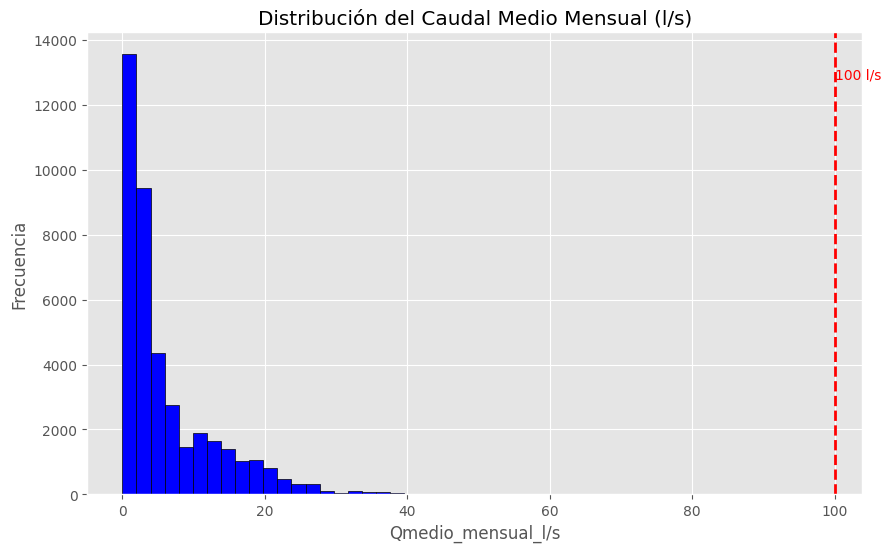

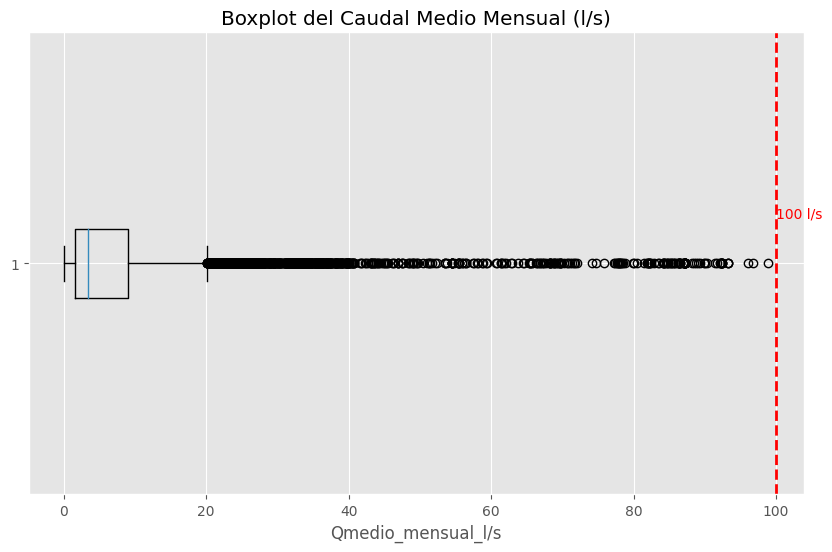

In [55]:
# Uso de las funciones
describe_caudal_mensual(Q_Medio_Mensual_filtrado)
plot_histogram(Q_Medio_Mensual_filtrado)
plot_boxplot(Q_Medio_Mensual_filtrado)

Se ajusta el número de registros de acuerdo a los 444 Pozos filtrados (Campo Origen en el Dataset)

In [56]:
Q_Medio_Mensual_filtrado.shape

(41226, 3)

In [57]:
negativos_Q_Medio_Mensual_filtrado = Q_Medio_Mensual_filtrado[Q_Medio_Mensual_filtrado['Qmedio_mensual_l/s'] < 0]

print("Valores negativos en 'Qmedio_mensual_l/s':")
print(negativos_Q_Medio_Mensual_filtrado)

Valores negativos en 'Qmedio_mensual_l/s':
Empty DataFrame
Columns: [Origen, Mes-Año, Qmedio_mensual_l/s]
Index: []


In [58]:
print(Q_Medio_Mensual_filtrado)

         Origen  Mes-Año  Qmedio_mensual_l/s
0      ARPES-01  01-2014            6.658555
1      ARPES-01  02-2014            7.717431
2      ARPES-01  03-2014            7.663063
3      ARPES-01  04-2014            7.573851
4      ARPES-01  05-2014            5.465879
...         ...      ...                 ...
41239   XP17-05  06-2024            0.274481
41240   XP17-05  08-2024            0.070146
41241   XP17-05  09-2024            0.100827
41242   XP17-05  10-2024            0.841751
41243   XP17-05  12-2024            0.211238

[41226 rows x 3 columns]


Valida los valores NULL o vacios para cada variable

In [59]:
# Chequeo de valores faltantes
print(Q_Medio_Mensual_filtrado.isnull().sum())

Origen                0
Mes-Año               0
Qmedio_mensual_l/s    0
dtype: int64


4. Valida el Número de Pozos contenidos en el Dataset

In [60]:
num_pozos = len(Q_Medio_Mensual_filtrado['Origen'].unique())

print("Número de Pozos:", num_pozos)

Número de Pozos: 447


5. Creación un nuevo campo Fecha

In [61]:
def create_date_column(dataframe):
    """
    Create a 'Fecha' column from 'Mes-Año' and add 'Mes' and 'Año' columns.

    Args:
        dataframe (pd.DataFrame): Input dataframe with 'Mes-Año' column.

    Returns:
        pd.DataFrame: Dataframe with new 'Fecha', 'Mes', and 'Año' columns.
    """
    dataframe['Fecha'] = pd.to_datetime(dataframe['Mes-Año'], format='%m-%Y').dt.to_period('M').dt.start_time
    dataframe['Mes'] = dataframe['Fecha'].dt.month
    dataframe['Agno'] = dataframe['Fecha'].dt.year
    return dataframe


In [62]:
Q_Medio_Mensual_filtrado = create_date_column(Q_Medio_Mensual_filtrado)
print(Q_Medio_Mensual_filtrado)


         Origen  Mes-Año  Qmedio_mensual_l/s      Fecha  Mes  Agno
0      ARPES-01  01-2014            6.658555 2014-01-01    1  2014
1      ARPES-01  02-2014            7.717431 2014-02-01    2  2014
2      ARPES-01  03-2014            7.663063 2014-03-01    3  2014
3      ARPES-01  04-2014            7.573851 2014-04-01    4  2014
4      ARPES-01  05-2014            5.465879 2014-05-01    5  2014
...         ...      ...                 ...        ...  ...   ...
41239   XP17-05  06-2024            0.274481 2024-06-01    6  2024
41240   XP17-05  08-2024            0.070146 2024-08-01    8  2024
41241   XP17-05  09-2024            0.100827 2024-09-01    9  2024
41242   XP17-05  10-2024            0.841751 2024-10-01   10  2024
41243   XP17-05  12-2024            0.211238 2024-12-01   12  2024

[41226 rows x 6 columns]


In [63]:
Q_Medio_Mensual_filtrado.head()

,Origen,Mes-Año,Qmedio_mensual_l/s,Fecha,Mes,Agno
0,ARPES-01,01-2014,6.658555,2014-01-01,1,2014
1,ARPES-01,02-2014,7.717431,2014-02-01,2,2014
2,ARPES-01,03-2014,7.663063,2014-03-01,3,2014
3,ARPES-01,04-2014,7.573851,2014-04-01,4,2014
4,ARPES-01,05-2014,5.465879,2014-05-01,5,2014


In [64]:
Q_Medio_Mensual_filtrado.dtypes

Origen                        object
Mes-Año                       object
Qmedio_mensual_l/s           float64
Fecha                 datetime64[ns]
Mes                            int32
Agno                           int32
dtype: object

5. Validar campo Fecha este correctamente asignada a un dato tipo Fecha. 
   Agrega dos columnas 'Mes' y 'Agno' (Año)

In [65]:
Q_Medio_Mensual_filtrado['Mes'] = Q_Medio_Mensual_filtrado['Fecha'].dt.month
Q_Medio_Mensual_filtrado['Agno'] = Q_Medio_Mensual_filtrado['Fecha'].dt.year

In [66]:
Q_Medio_Mensual_filtrado.dtypes

Origen                        object
Mes-Año                       object
Qmedio_mensual_l/s           float64
Fecha                 datetime64[ns]
Mes                            int32
Agno                           int32
dtype: object

In [67]:
print(Q_Medio_Mensual_filtrado.head())

     Origen  Mes-Año  Qmedio_mensual_l/s      Fecha  Mes  Agno
0  ARPES-01  01-2014            6.658555 2014-01-01    1  2014
1  ARPES-01  02-2014            7.717431 2014-02-01    2  2014
2  ARPES-01  03-2014            7.663063 2014-03-01    3  2014
3  ARPES-01  04-2014            7.573851 2014-04-01    4  2014
4  ARPES-01  05-2014            5.465879 2014-05-01    5  2014


Función para Validar la Cantidad de Datos por Año en Términos de Volumen

6. Válida la la cantidad de datos por año en términos de volumen

In [68]:
def plot_data_volume_per_year(Q_Medio_Mensual_filtrado):
    plt.style.use('ggplot')
    
    data_per_year = Q_Medio_Mensual_filtrado.groupby('Agno').size().reset_index(name='Counts')
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data_per_year, x='Agno', y='Counts', hue='Counts', size='Counts', sizes=(50, 500), legend=False)
    
    plt.title('Volumen de datos por año')
    plt.xlabel('Año')
    plt.ylabel('Volumen de datos')
    plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
    plt.show()
    
    return data_per_year

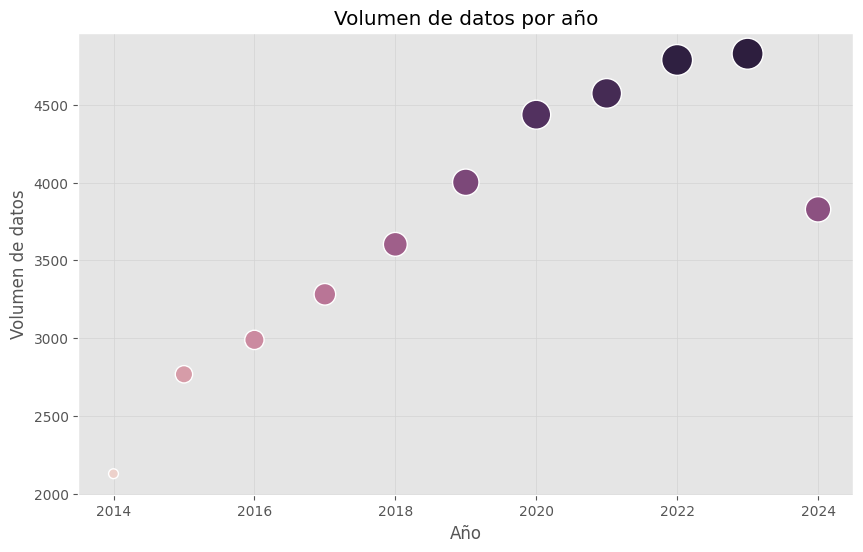

In [69]:
# Implementacion de la vizualización
data_per_year = plot_data_volume_per_year(Q_Medio_Mensual_filtrado)

### Estadísticas Descriptivas

Función para Generar Estadísticas Descriptivas

In [70]:

def calculate_descriptive_statistics(df):
    """
    Calcula las estadísticas descriptivas del DataFrame agrupado por 'Origen' y 'Fecha' (año).
    
    Args:
        df (pd.DataFrame): DataFrame que contiene los datos filtrados y procesados.

    Returns:
        pd.DataFrame: DataFrame con las estadísticas descriptivas.
    """
    df_grouped_caudal = df.groupby(['Origen', df['Fecha'].dt.year])['Qmedio_mensual_l/s']
    return df_grouped_caudal.describe()

def visualize_descriptive_statistics(df_grouped_caudal):
    """
    Muestra las estadísticas descriptivas y las guarda en un archivo Excel.

    Args:
        df_grouped_caudal (pd.DataFrame): DataFrame con las estadísticas descriptivas calculadas.
    """
    display(df_grouped_caudal)
    # Exportar a Excel (opcional)
    # df_grouped_caudal.describe().to_excel("df_grouped_caudal_describe.xlsx")

# Aplicación de las funciones
df_grouped_caudal = calculate_descriptive_statistics(Q_Medio_Mensual_filtrado)
visualize_descriptive_statistics(df_grouped_caudal)


count      mean       std       min       25%       50%  \
Origen   Fecha                                                            
ARPES-01 2014    12.0  7.147245  0.885572  5.461704  6.655109  7.618457   
         2015    12.0  7.788604  0.134295  7.530274  7.701870  7.795128   
         2016    12.0  6.565493  0.245723  6.042637  6.475724  6.598756   
         2017    12.0  6.366669  0.203386  5.945192  6.282884  6.366616   
         2018    12.0  6.540190  0.057732  6.373618  6.535623  6.554380   
...               ...       ...       ...       ...       ...       ...   
XP17-05  2020    12.0  0.409689  0.016351  0.389959  0.396284  0.405874   
         2021    12.0  0.318124  0.044463  0.268312  0.287928  0.310807   
         2022    12.0  0.311147  0.014214  0.274141  0.306928  0.312025   
         2023    12.0  0.296822  0.008433  0.283924  0.291464  0.296765   
         2024    10.0  0.300036  0.213828  0.070146  0.221816  0.262239   

                     75%       max  
Origen   Fecha                      
ARPES-01 2014   7.754153  7.793820  
         2015   7.895342  7.953326  
         2016   6.683772  6.992993  
         2017   6.455569  6.818050  
         2018   6.570661  6.588226  
...                  ...       ...  
XP17-05  2020   0.424567  0.435761  
         2021   0.330615  0.442213  
         2022   0.319240  0.327536  
         2023   0.304601  0.306901  
         2024   0.305332  0.841751  

[3608 rows x 8 columns]

In [71]:
def plot_yearly_data(df, origen, y_max=10):
    """
    Grafica los datos anuales de Qmedio_mensual_l/s para un pozo específico.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos filtrados y procesados.
        origen (str): El origen (pozo) específico que se desea graficar.
        y_max (int, opcional): Límite superior del eje y. Predeterminado es 10 l/s.
    """
    plt.style.use('ggplot')
    
    # Filtrar los datos para el pozo específico
    pozo_data = df[df['Origen'] == origen].copy()
    
    # Asegurar que la columna 'Mes-Año' es de tipo datetime
    pozo_data['Mes-Año'] = pd.to_datetime(pozo_data['Mes-Año'], format='%m-%Y')

    # Graficar los datos anuales
    plt.figure(figsize=(15, 7))
    for year in pozo_data['Mes-Año'].dt.year.unique():
        yearly_data = pozo_data[pozo_data['Mes-Año'].dt.year == year]
        plt.scatter(yearly_data['Mes-Año'], yearly_data['Qmedio_mensual_l/s'], label=f'Año {year}', alpha=0.6)
    
    # Ajustar el límite superior del eje y
    plt.ylim(0, y_max)
    
    # Configurar los formatos de fecha en el eje x
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    
    # Rotar las fechas para mejor visualización
    plt.xticks(rotation=0)
    
    # Añadir etiquetas y título
    plt.xlabel('Periodo')
    plt.ylabel('Qmedio_mensual_l/s')
    plt.title(origen)
    
    # Añadir la cuadrícula
    plt.grid(True)
    
    # Ajustar el formato y añadir la leyenda
    plt.tight_layout()
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

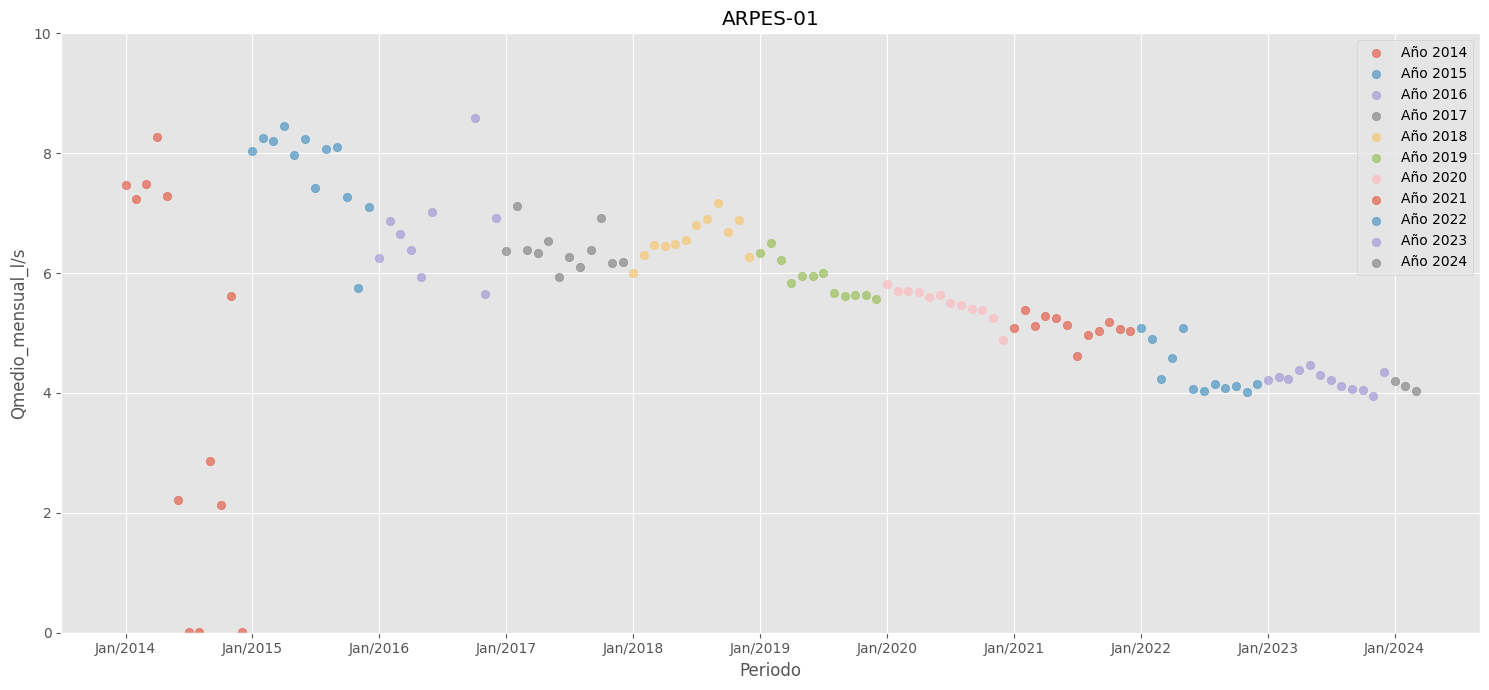

In [73]:

# Visualización de los datos anuales para un pozo específico
plot_yearly_data(Q_Medio_Mensual_filtrado, 'ARPES-01')

In [72]:
def save_to_excel(df, output_path):
    """
    Guarda el DataFrame proporcionado en un archivo Excel.

    Args:
        df (pd.DataFrame): DataFrame a guardar.
        output_path (str): Ruta del archivo Excel de salida.
    """
    df.to_excel(output_path, index=False)

In [73]:
# Ejemplo de uso
Q_Medio_Mensual_filtrado_final = Q_Medio_Mensual_filtrado[['Origen', 'Fecha', 'Qmedio_mensual_l/s']].copy()
save_to_excel(Q_Medio_Mensual_filtrado_final, 'Q_Medio_Mensual_output_17072024.xlsx')
Q_Medio_Mensual_filtrado_final.head()

,Origen,Fecha,Qmedio_mensual_l/s
0,ARPES-01,2014-01-01,6.658555
1,ARPES-01,2014-02-01,7.717431
2,ARPES-01,2014-03-01,7.663063
3,ARPES-01,2014-04-01,7.573851
4,ARPES-01,2014-05-01,5.465879


# Flujo 4 preprocesamiento4 de datos
### - Agregar columna 'Mes-Año'
### - Validación Rango variable Caudal Calculada Caudal Medio Menesual l/s
### - Creación un nuevo campo Fecha
### - Valida la la cantidad de datos por año en términos de volumen
### - Generar Estadísticas Descriptivas
### - Grafica la evolución temporal del caudal medio mensual por Origen.
### - exportar archivo procesado caudal medio mensual